# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'ECON0150/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
df = pd.read_csv('Life Expectancy Data.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

                Country  Year      Status  Life expectancy   Adult Mortality  \
0           Afghanistan  2015  Developing              65.0            263.0   
16              Albania  2015  Developing              77.8             74.0   
32              Algeria  2015  Developing              75.6             19.0   
48               Angola  2015  Developing              52.4            335.0   
64  Antigua and Barbuda  2015  Developing              76.4             13.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
16              0     4.60              364.975229         99.0         0   
32             21      NaN                0.000000         95.0        63   
48             66      NaN                0.000000         64.0       118   
64              0      NaN                0.000000         99.0         0   

    ...  Polio  Total expenditure  Diphtheria    HIV/AID

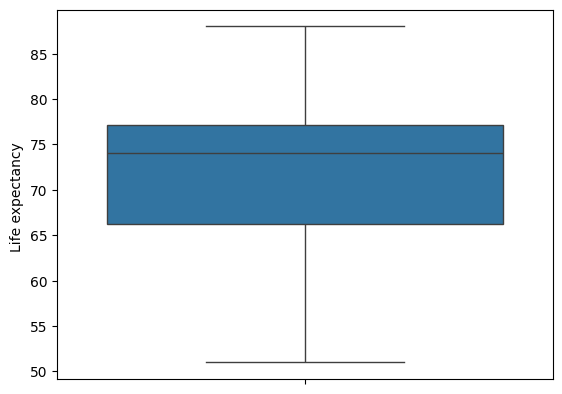

In [ ]:

df_2015=df[df['Year']==2015]
print(df_2015.head())
print(df_2015.columns.tolist())
cleaned_df = df_2015[['Country','Life expectancy ','GDP','percentage expenditure',' BMI ']]
cleaned_df=cleaned_df.dropna()
print(cleaned_df.head())
# Data operations here
print(cleaned_df.info)
print(cleaned_df.isna().sum())
sns.boxplot(y='Life expectancy ',data=cleaned_df)
plt.show()




In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

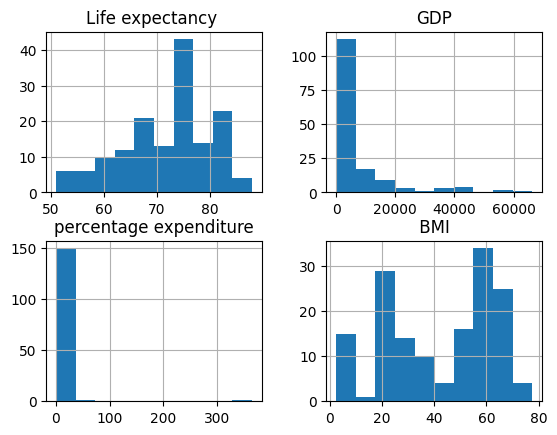

Text(0, 0.5, 'Life Expectancy ')

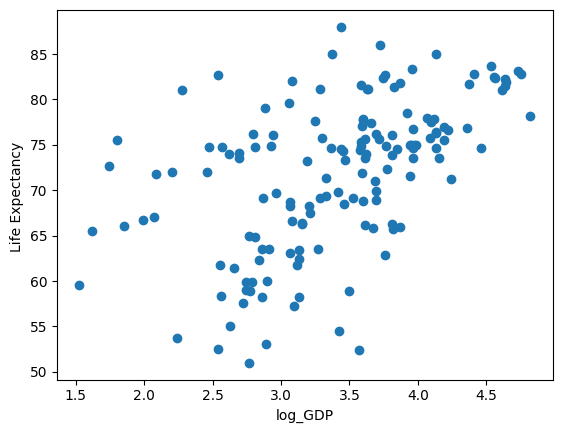

In [ ]:
cleaned_df.hist()
plt.show()
#insert bar graph of all countrys
#scatter plots for GDP, Percent Expenditure, BMI
#plt.scatter(cleaned_df['GDP'], cleaned_df['Life expectancy '])
#plt.xlabel('GDP')
#plt.ylabel('Life Expectancy ')

cleaned_df['log_GDP'] = np.log10(cleaned_df['GDP'])
plt.scatter(cleaned_df['log_GDP'], cleaned_df['Life expectancy '])
plt.xlabel('log_GDP')
plt.ylabel('Life Expectancy ')


Text(0, 0.5, 'Life Expectancy ')

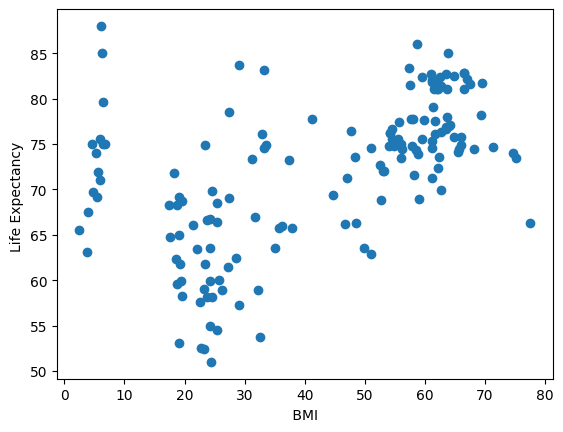

In [ ]:

#scatter plots BMI
plt.scatter(cleaned_df[' BMI '], cleaned_df['Life expectancy '])
plt.xlabel(' BMI ')
plt.ylabel('Life Expectancy ')



## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

['Country', 'Life expectancy ', 'GDP', 'percentage expenditure', ' BMI ', 'log_GDP', 'Life_expectancy']
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0077      2.997     17.021      0.000      45.134      56.881
log_GDP        6.1233      0.790      7.754      0.000       4.576       7.671


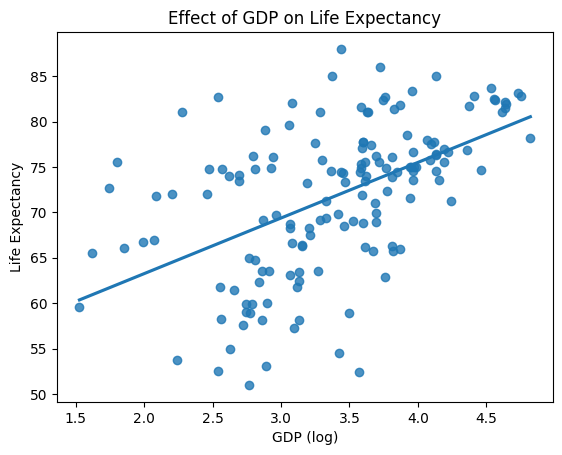

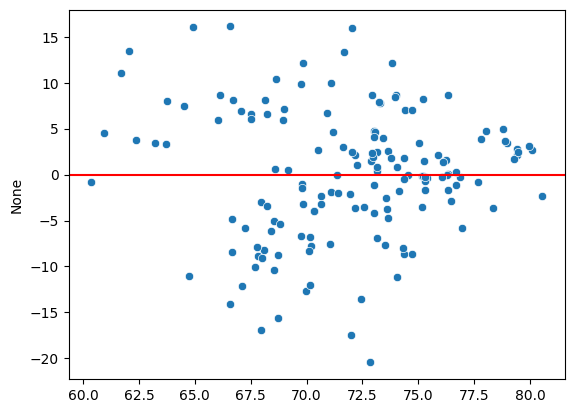

In [ ]:
#Null Hypothesis - GDP does not affect life expectancy
cleaned_df['Life_expectancy']=cleaned_df['Life expectancy ']
print(cleaned_df.columns.tolist())
model = smf.ols(formula='Life_expectancy ~ log_GDP', data=cleaned_df)
res = model.fit(cov_type='HC0')  # Fit with robust standard errors
print(res.summary().tables[1])
sns.regplot(y='Life_expectancy', x='log_GDP', data=cleaned_df, ci=None)
plt.xlabel("GDP (log)")
plt.ylabel("Life Expectancy")
plt.title("Effect of GDP on Life Expectancy")

plt.figure()
residuals = res.resid
predictions = res.predict()
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red')


['Country', 'Life expectancy ', 'GDP', 'percentage expenditure', ' BMI ', 'log_GDP', 'Life_expectancy', 'BMI']
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1208      1.699     37.144      0.000      59.790      66.451
BMI            0.2057      0.031      6.590      0.000       0.145       0.267


Text(0.5, 1.0, 'Effect of BMI on Life Expectancy')

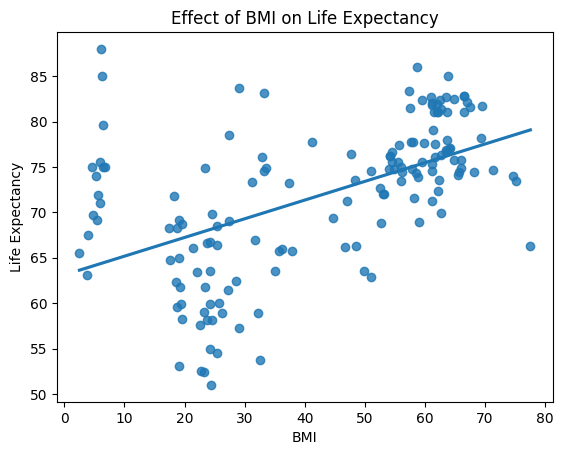

In [ ]:
#model for BMI
#Null Hypothesis - BMI does not affect life expectancy
cleaned_df['BMI']=cleaned_df[' BMI ']
print(cleaned_df.columns.tolist())
model = smf.ols(formula='Life_expectancy ~ BMI ', data=cleaned_df)
res = model.fit(cov_type='HC0')  # Fit with robust standard errors
print(res.summary().tables[1])
sns.regplot(y='Life_expectancy', x='BMI', data=cleaned_df, ci=None)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.title("Effect of BMI on Life Expectancy")